<a href="https://colab.research.google.com/github/ifeomai/curly-octo-r-stat-machine/blob/main/ica-stat-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q8 - White House Salries

In [25]:
library(readxl)
ds_salaries <- read_excel("/content/2010_White_House_Staff.xlsx")

In [26]:
summary(ds_salaries)

 Employee Name      Employee Status        Salary        Pay Basis        
 Length:469         Length:469         Min.   :     0   Length:469        
 Class :character   Class :character   1st Qu.: 45900   Class :character  
 Mode  :character   Mode  :character   Median : 66300   Mode  :character  
                                       Mean   : 82721                     
                                       3rd Qu.:113000                     
                                       Max.   :179700                     
 Position Title    
 Length:469        
 Class :character  
 Mode  :character  
                   
                   
                   

In [27]:
range(ds_salaries$Salary)

[1]      0 179700

In [28]:
sd(ds_salaries$Salary)

[1] 41589.43

In [29]:
IQR(ds_salaries$Salary)

[1] 67100

In [30]:
var(ds_salaries$Salary)

[1] 1729680969

In [31]:
#What is the mean salary
print(paste("Mean: ",  mean(ds_salaries$Salary)))

#What is the median of salary in the sample
print(paste("Median: ",  median(ds_salaries$Salary)))

#What is the min salary
print(paste("Min Salary: ",  min(ds_salaries$Salary)))

#What is the max salary
print(paste("Max Salary: ",  max(ds_salaries$Salary)))

#What is the variance of the salary
print(paste("Variance: ",  var(ds_salaries$Salary)))

#What is range of salaries are found in the sample
print("Range: ")
range(ds_salaries$Salary)

#What are the default quartiles of salary (0, 25, 50, 75, 100)

print("Quartile: ")
quantile(ds_salaries$Salary)

#What is the inter quartile range of salary

print(paste("Inter Quartile Range: ",  IQR(ds_salaries$Salary)))

#What is the standard deviation of salary
print(paste("Standard Deviation: ",  sd(ds_salaries$Salary)))

#Summarize salary

print("Summary: ")
summary(ds_salaries$Salary)

[1] "Mean:  82721.3368869936"
[1] "Median:  66300"
[1] "Min Salary:  0"
[1] "Max Salary:  179700"
[1] "Variance:  1729680968.97601"
[1] "Range: "


[1]      0 179700

[1] "Quartile: "


0%    25%    50%    75%   100% 
     0  45900  66300 113000 179700

[1] "Inter Quartile Range:  67100"
[1] "Standard Deviation:  41589.433381281"
[1] "Summary: "


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0   45900   66300   82721  113000  179700 

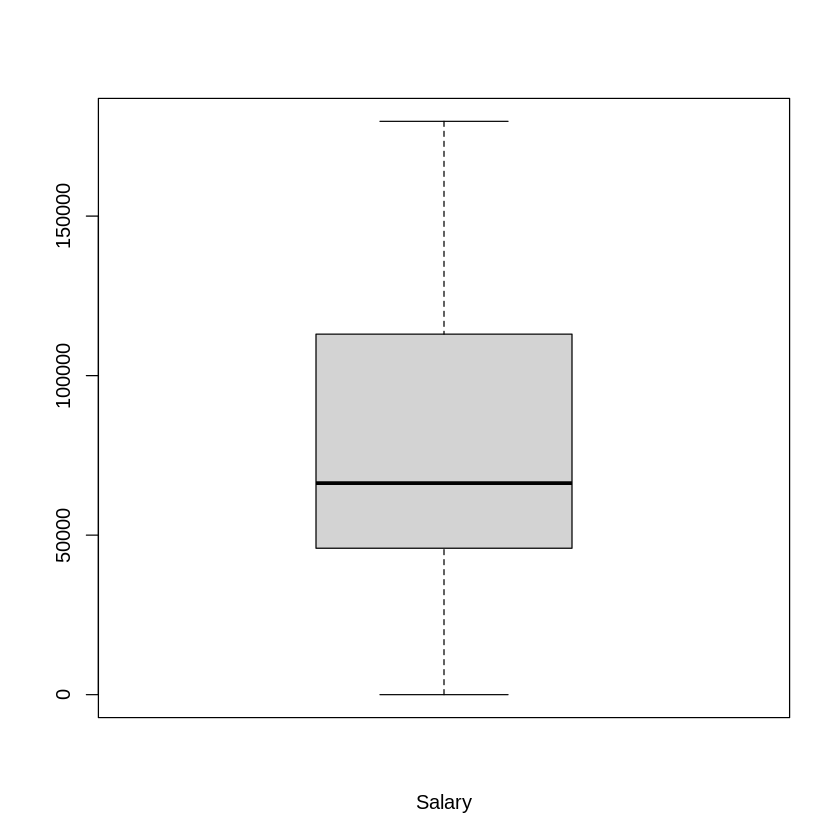

In [32]:
boxplot(ds_salaries$Salary, xlab ="Salary")

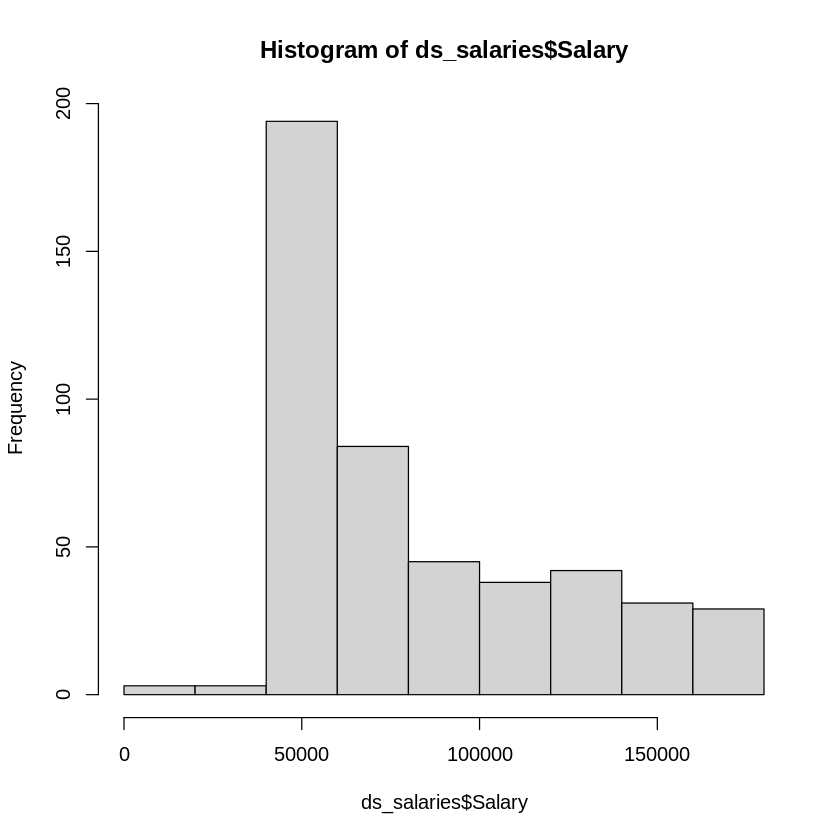

In [33]:
hist(ds_salaries$Salary)

# Q9 

In [34]:
pnorm(0.5, mean=1.9, sd=2, lower.tail=TRUE)

[1] 0.2419637

# Q11: CPU Speed 

In [35]:
# One Sampte t test 
# http://www.sthda.com/english/wiki/one-sample-t-test-in-r

In [36]:
# Normal Distribution with Mean=2.1 Standard Deviation = 0.4
# Use one Sample T test to find the z value
clock_speed <- c(2.5,1.7,2.9,2.7,1.4,1.9,1.3,1.9,2.8,2.2,2.4, 1.7, 1.8, 2.2, 2.2,1.9, 2.7, 3.3, 1.9, 2.1)

summary(clock_speed)
t.test(clock_speed, mu=2.1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.300   1.875   2.150   2.175   2.550   3.300 


	One Sample t-test

data:  clock_speed
t = 0.64377, df = 19, p-value = 0.5274
alternative hypothesis: true mean is not equal to 2.1
95 percent confidence interval:
 1.931162 2.418838
sample estimates:
mean of x 
    2.175 


In [37]:
install.packages("lsr")
library("lsr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [38]:
oneSampleTTest( x=clock_speed, mu=2.1 )


   One sample t-test 

Data variable:   clock_speed 

Descriptive statistics: 
            clock_speed
   mean           2.175
   std dev.       0.521

Hypotheses: 
   null:        population mean equals 2.1 
   alternative: population mean not equal to 2.1 

Test results: 
   t-statistic:  0.644 
   degrees of freedom:  19 
   p-value:  0.527 

Other information: 
   two-sided 95% confidence interval:  [1.931, 2.419] 
   estimated effect size (Cohen's d):  0.144 


# Q12

In [39]:
# to run sample.split, this lib is needed
install.packages("caTools")
library(caTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [40]:
ds_boxOffice <-  read.csv("/content/boxOffice.csv")
# check the head to see the key variable names
head(ds_boxOffice,2)

,Oscar,BoxOffice,Budget,Country,Critics,Length
,<int>,<dbl>,<dbl>,<chr>,<dbl>,<int>
1,0,69.03,26.89,Europe,25.8,99
2,0,15.22,20.77,India,10.0,125


In [41]:
set.seed(48)
sample = sample.split(ds_boxOffice$Budget ,SplitRatio = .8)
train = subset(ds_boxOffice, sample == TRUE)
test = subset(ds_boxOffice, sample == FALSE)

In [42]:
trainModel = glm(Oscar ~ Budget, family = binomial (link = "logit"), data= train)
summary(trainModel)


Call:
glm(formula = Oscar ~ Budget, family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9060  -0.8806  -0.8598   1.4912   1.5385  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept) -0.838252   0.259770  -3.227  0.00125 **
Budget       0.001264   0.003996   0.316  0.75174   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 299.68  on 239  degrees of freedom
Residual deviance: 299.58  on 238  degrees of freedom
AIC: 303.58

Number of Fisher Scoring iterations: 4
